In [691]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Data Loading and Exploration

In [692]:
file_path = "Diabetes_Prediction_2018_2022.csv"
diabetes = pd.read_csv(file_path)

In [693]:
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Column1
0,0,0,1,0,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,NaN
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,NaN
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,NaN
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,NaN
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,NaN


In [694]:
diabetes.shape

(1048575, 22)

In [695]:
diabetes.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Column1
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,0.0
mean,2.966712e-01,4.284558e-01,4.237894e-01,9.626732e-01,2.836746e+01,4.429440e-01,4.053501e-02,9.394655e-02,7.572782e-01,6.345812e-01,...,9.508953e-01,8.443268e-02,2.510770e+00,3.188775e+00,4.243893e+00,1.680500e-01,4.402995e-01,8.028302e+00,5.051333e+00,NaN
std,6.978521e-01,4.948552e-01,4.941581e-01,1.895616e-01,6.593975e+00,4.967342e-01,1.972105e-01,2.917545e-01,4.287285e-01,4.815476e-01,...,2.160868e-01,2.780358e-01,1.069081e+00,7.413574e+00,8.717558e+00,3.739108e-01,4.964233e-01,3.055655e+00,9.868873e-01,NaN
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,NaN
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,4.000000e+00,NaN
50%,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,5.000000e+00,NaN
75%,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01,6.000000e+00,NaN
max,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,5.000000e+00,3.000000e+01,3.000000e+01,1.000000e+00,1.000000e+00,1.300000e+01,6.000000e+00,NaN


In [696]:
diabetes.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Column1
0,0,0,1,0,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,NaN
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,NaN
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,NaN
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,NaN
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,NaN


In [697]:
column_name_list=diabetes.columns.tolist()

In [698]:
diabetes['Diabetes_012'] = diabetes['Diabetes_012'].replace(2, 1)

In [699]:
column_name_list

['Diabetes_012',
 'HighBP',
 'HighChol',
 'CholCheck',
 'BMI',
 'Smoke',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysicalActivity',
 'Fruits',
 'Veggies',
 'AlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'DiffWalk',
 'Sex',
 'Age',
 'Education',
 'Column1']

# Data Cleaning and Preprocessing

In [700]:
diabetes = diabetes.rename(columns={'Diabetes_012': 'Diabetes_Outcome'})

In [701]:
diabetes.head()

,Diabetes_Outcome,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Column1
0,0,0,1,0,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,NaN
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,NaN
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,NaN
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,NaN
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,NaN


In [702]:
diabetes.drop('Column1', axis=1, inplace=True)

In [703]:
diabetes.drop('Education', axis=1, inplace=True)

In [704]:
diabetes.head()

,Diabetes_Outcome,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,Veggies,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,0,1,0,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9
3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11
4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11


In [705]:
diabetes.fillna(diabetes.mean(), inplace=True)

In [532]:
diabetes.isnull().sum()

Diabetes_Outcome        0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoke                   0
Stroke                  0
HeartDiseaseorAttack    0
PhysicalActivity        0
Fruits                  0
Veggies                 0
AlcoholConsump          0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

In [706]:
diabetes.drop_duplicates(inplace=True)

In [707]:
diabetes['Diabetes_Outcome'].value_counts()

0    156385
1     37751
Name: Diabetes_Outcome, dtype: int64

In [708]:
diabetes.shape

(194136, 20)

In [709]:
diabetes.describe()

,Diabetes_Outcome,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,Veggies,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
count,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000,194136.000000
mean,0.194456,0.474219,0.457777,0.954357,29.061606,0.479932,0.052644,0.117608,0.701091,0.590030,0.773252,0.068303,0.937606,0.108723,2.708586,4.112164,5.486546,0.216606,0.437925,8.051217
std,0.395783,0.499336,0.498215,0.208711,7.117072,0.499598,0.223321,0.322145,0.457781,0.491829,0.418729,0.252265,0.241871,0.311292,1.079147,8.222245,9.578846,0.411933,0.496133,3.100449
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,0.000000,1.000000,10.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000


# Exploratory Data Analysis 

<AxesSubplot:>

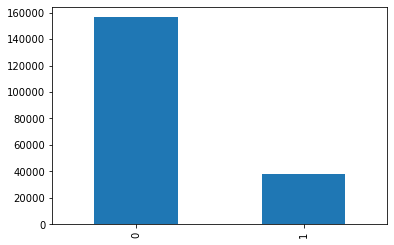

In [710]:
diabetes['Diabetes_Outcome'].value_counts().plot.bar()

In [711]:
correlations = diabetes.corr(method = 'pearson') 
print("Correlations of attributes in the Diabetes:\n") 
correlations

Correlations of attributes in the Diabetes:



,Diabetes_Outcome,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,Veggies,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
Diabetes_Outcome,1.000000,0.255398,0.199853,0.088491,0.199292,0.037255,0.089612,0.158337,-0.085373,-0.012522,-0.029839,-0.079529,0.036614,0.009892,0.264280,0.036627,0.138530,0.193198,0.029509,0.197753
HighBP,0.255398,1.000000,0.268875,0.123025,0.184148,0.065022,0.125250,0.198943,-0.096955,-0.013820,-0.036163,-0.022292,0.062961,-0.009124,0.259231,0.023707,0.137848,0.210622,0.047247,0.332992
HighChol,0.199853,0.268875,1.000000,0.103650,0.078407,0.066285,0.088960,0.173150,-0.055935,-0.022063,-0.021720,-0.026440,0.061556,-0.006055,0.175886,0.041067,0.104771,0.132397,0.021510,0.254124
CholCheck,0.088491,0.123025,0.103650,1.000000,0.051153,-0.001745,0.034423,0.059078,-0.015238,0.014164,-0.007793,-0.018077,0.113378,-0.048490,0.080384,0.009971,0.056072,0.063289,-0.027238,0.100457
BMI,0.199292,0.184148,0.078407,0.051153,1.000000,-0.021045,-0.000339,0.025726,-0.110629,-0.053577,-0.028872,-0.069359,0.002080,0.031371,0.181914,0.048107,0.080432,0.167064,0.017489,-0.049715
Smoke,0.037255,0.065022,0.066285,-0.001745,-0.021045,1.000000,0.052821,0.101816,-0.062073,-0.056711,-0.008407,0.093845,-0.010469,0.032429,0.129064,0.072866,0.095909,0.105308,0.090870,0.102983
Stroke,0.089612,0.125250,0.088960,0.034423,-0.000339,0.052821,1.000000,0.194828,-0.046917,0.005107,-0.023281,-0.028715,0.021807,0.017698,0.160054,0.046987,0.126297,0.157639,0.004436,0.141064
HeartDiseaseorAttack,0.158337,0.198943,0.173150,0.059078,0.025726,0.101816,0.194828,1.000000,-0.058657,0.004436,-0.015385,-0.045351,0.036730,0.008560,0.234312,0.033809,0.154002,0.190103,0.091057,0.240157
PhysicalActivity,-0.085373,-0.096955,-0.055935,-0.015238,-0.110629,-0.062073,-0.046917,-0.058657,1.000000,0.110819,0.119556,0.036689,0.010203,-0.026565,-0.213737,-0.080272,-0.175163,-0.215946,0.036976,-0.100366
Fruits,-0.012522,-0.013820,-0.022063,0.014164,-0.053577,-0.056711,0.005107,0.004436,0.110819,1.000000,0.232089,-0.022618,0.015243,-0.020919,-0.049803,-0.035952,-0.002447,-0.011984,-0.080545,0.067270


<AxesSubplot:>

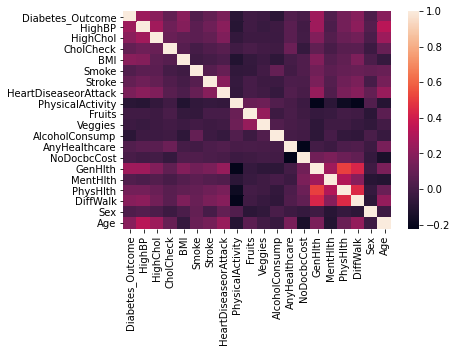

In [712]:
sns.heatmap(data = diabetes.corr())

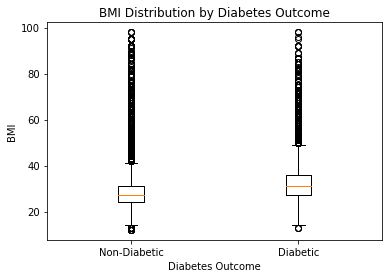

In [713]:
diabetes['BMI'] 
plt.boxplot([diabetes.loc[diabetes['Diabetes_Outcome'] == 0, 'BMI'],
             diabetes.loc[diabetes['Diabetes_Outcome'] == 1, 'BMI']],
            labels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Diabetes Outcome')
plt.ylabel('BMI')
plt.title('BMI Distribution by Diabetes Outcome')
plt.show()

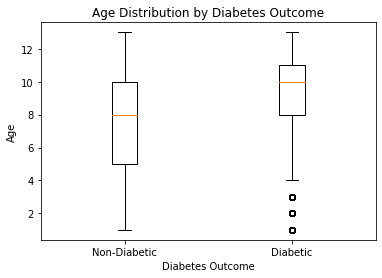

In [714]:
diabetes['Age'] 
plt.boxplot([diabetes.loc[diabetes['Diabetes_Outcome'] == 0, 'Age'],
             diabetes.loc[diabetes['Diabetes_Outcome'] == 1, 'Age']],
            labels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Diabetes Outcome')
plt.ylabel('Age')
plt.title('Age Distribution by Diabetes Outcome')
plt.show()

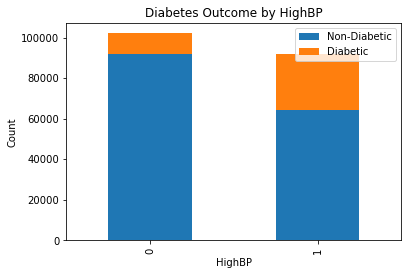

In [716]:
diabetes.groupby(['HighBP', 'Diabetes_Outcome']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('HighBP')
plt.ylabel('Count')
plt.title('Diabetes Outcome by HighBP')
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.show()

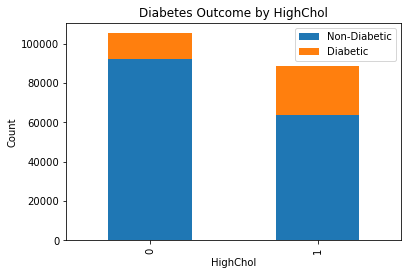

In [717]:
diabetes.groupby(['HighChol', 'Diabetes_Outcome']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('HighChol')
plt.ylabel('Count')
plt.title('Diabetes Outcome by HighChol')
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.show()

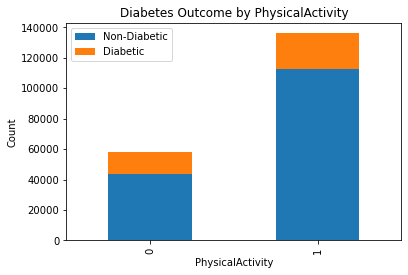

In [718]:
diabetes.groupby(['PhysicalActivity', 'Diabetes_Outcome']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('PhysicalActivity')
plt.ylabel('Count')
plt.title('Diabetes Outcome by PhysicalActivity')
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.show()

# Statistical Analysis: chi-square test

In [719]:
contingency_table = pd.crosstab(diabetes['Diabetes_Outcome'], pd.cut(diabetes['HighBP'], bins=3))
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2) #a strong association or dependency between the two variables
print("P-value:", p_value) #p-value of 0.0 suggests the association is statistically significant
print("Degrees of freedom:", dof) 
print("Expected frequencies:\n", expected)

Chi-square statistic: 12661.819399097072
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
 [[82224.24540013 74160.75459987]
 [19848.75459987 17902.24540013]]


In [720]:
contingency_table = pd.crosstab(diabetes['Diabetes_Outcome'], pd.cut(diabetes['HighChol'], bins=3))
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)#a strong association or dependency between the two variables
print("P-value:", p_value) #p-value of 0.0 suggests the association is statistically significant
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 7752.984248902407
P-value: 0.0
Degrees of freedom: 1
Expected frequencies:
 [[84795.54036861 71589.45963139]
 [20469.45963139 17281.54036861]]


# Statistical Analysis: T-test

In [721]:
grouped = diabetes.groupby(['HighBP', 'Diabetes_Outcome']).size().unstack()
grouped['Total'] = grouped.sum(axis=1)
grouped.rename(columns={0: 'Non-Diabetic', 1: 'Diabetic'}, inplace=True)
grouped.index = ['No High Blood Pressure', 'High Blood Pressure']
grouped.columns.name = 'Diabetes Outcome'
print(grouped)

Diabetes Outcome        Non-Diabetic  Diabetic   Total
No High Blood Pressure         92023     10050  102073
High Blood Pressure            64362     27701   92063


In [722]:
diabetic = diabetes[diabetes['Diabetes_Outcome'] == 1]['HighBP']
non_diabetic = diabetes[diabetes['Diabetes_Outcome'] == 0]['HighBP']
t_statistic, p_value = stats.ttest_ind(diabetic, non_diabetic)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value) #p-value of 0.0 indicates the probability of observing such a large t-statistic 

T-Statistic: 116.38985961412975
P-Value: 0.0


In [723]:
grouped_1 = diabetes.groupby(['HighChol', 'Diabetes_Outcome']).size().unstack()
grouped_1['Total'] = grouped_1.sum(axis=1)
grouped_1.rename(columns={0: 'Non-Diabetic', 1: 'Diabetic'}, inplace=True)
grouped_1.index = ['No High Cholesterol', 'High Cholesterol']
grouped_1.columns.name = 'Diabetes Outcome'
print(grouped_1)

Diabetes Outcome     Non-Diabetic  Diabetic   Total
No High Cholesterol         92446     12819  105265
High Cholesterol            63939     24932   88871


In [724]:
diabetic = diabetes[diabetes['Diabetes_Outcome'] == 1]['HighChol']
non_diabetic = diabetes[diabetes['Diabetes_Outcome'] == 0]['HighChol']#there is a significant disparity in 'HighBP' levels between individuals with diabetes and those without diabetes
t_statistic, p_value = stats.ttest_ind(diabetic, non_diabetic)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 89.86936029725344
P-Value: 0.0


# Splitting the data

In [725]:
X = diabetes.iloc[:, [1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18]]

In [726]:
X

,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,Fruits,Veggies,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex
0,0,1,0,40,1,0,0,0,1,1,0,5,18,15,1,0
1,0,0,0,25,1,0,0,0,0,0,1,3,0,0,0,0
2,1,1,1,28,0,0,0,1,0,1,1,5,30,30,1,0
3,1,0,1,27,0,0,0,1,1,1,0,2,0,0,0,0
4,1,1,1,24,0,0,0,1,1,1,0,2,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507373,1,1,1,28,0,0,0,0,1,1,0,4,0,15,1,0
761040,1,1,1,40,1,0,0,0,1,1,0,5,18,15,1,0
1014662,0,1,1,19,0,0,0,1,1,1,0,2,3,2,0,0
1014686,0,0,1,35,0,0,0,1,1,1,0,3,4,0,0,0


In [727]:
Y = diabetes.iloc[:,:1]

In [728]:
Y

,Diabetes_Outcome
0,0
1,0
2,0
3,0
4,0
...,...
507373,1
761040,0
1014662,1
1014686,0


In [729]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [730]:
len(x_train)

155308

In [731]:
sc = MinMaxScaler()

In [732]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

In [733]:
x_train_sc

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 1., 1.]])

# LogisticRegression 

In [734]:
logreg = LogisticRegression()

In [735]:
logreg.fit(x_train_sc, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [736]:
y_pred = logreg.predict(x_test_sc)

In [738]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [739]:
log_acc = metrics.accuracy_score(y_test,y_pred)

In [740]:
log_acc

0.8098537138147729

# RandomForestClassifier 

In [741]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("RandomForest_acc:", accuracy)

<ipython-input-741-cace0dfe5108>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(x_train, y_train)


RandomForest_acc: 0.7861594725455857
